In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'E:/download/kaggle_data_set/penjualan_mobil_toyota.csv')

In [4]:
df

,Bulan,Penjualan
0,2011-01,27619
1,2011-02,25532
2,2011-03,32275
3,2011-04,21128
4,2011-05,19554
...,...,...
144,2023-01,28970
145,2023-02,27336
146,2023-03,29471
147,2023-04,21518


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Bulan      149 non-null    object
 1   Penjualan  149 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [6]:
df.Bulan = pd.to_datetime(df.Bulan)

In [7]:
df.Bulan

0     2011-01-01
1     2011-02-01
2     2011-03-01
3     2011-04-01
4     2011-05-01
         ...    
144   2023-01-01
145   2023-02-01
146   2023-03-01
147   2023-04-01
148   2023-05-01
Name: Bulan, Length: 149, dtype: datetime64[ns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Bulan      149 non-null    datetime64[ns]
 1   Penjualan  149 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.5 KB


In [9]:
df.isna().sum()

Bulan        0
Penjualan    0
dtype: int64

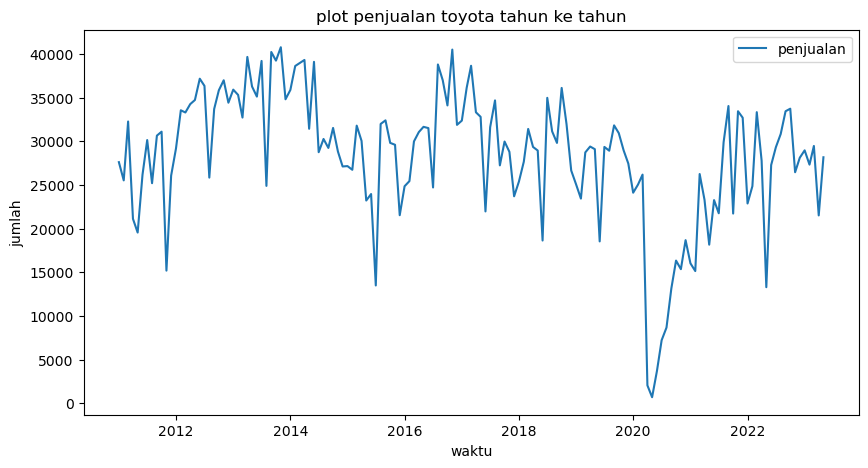

In [10]:
plt.figure(figsize = (10,5))
plt.plot(df.Bulan, df.Penjualan, label = 'penjualan')
plt.title('plot penjualan toyota tahun ke tahun')
plt.xlabel('waktu')
plt.ylabel('jumlah')
plt.legend()
plt.show()

In [11]:
df.Penjualan.describe()

count      149.000000
mean     28402.845638
std       7579.399557
min        695.000000
25%      25081.000000
50%      29362.000000
75%      33344.000000
max      40781.000000
Name: Penjualan, dtype: float64

In [12]:
df['Tahun'] = df.Bulan.dt.year

In [13]:
data_train = df[~df['Tahun'].isin([2020, 2021, 2022, 2023])]
data_testing = df[df['Tahun'].isin([2020,2021,2022,2023])]

In [14]:
data_train
data_testing

,Bulan,Penjualan,Tahun
108,2020-01-01,24119,2020
109,2020-02-01,25053,2020
110,2020-03-01,26191,2020
111,2020-04-01,2053,2020
112,2020-05-01,695,2020
113,2020-06-01,3705,2020
114,2020-07-01,7224,2020
115,2020-08-01,8673,2020
116,2020-09-01,13150,2020
117,2020-10-01,16345,2020


In [15]:
from statsmodels.tsa.stattools import adfuller

def ad_test(data):
    dftest = adfuller(data, autolag = 'AIC')
    print(f'1. ADF : {dftest[0]}')
    print(f'2. P-value : {dftest[1]}')
    print(f'3. Lags : {dftest[2]}')
    print('4. nilai kritis :')
    for key, val in dftest[4].items():
        print('\t', key, ': ',val)

In [16]:
ad_test(data_train.Penjualan)

1. ADF : -2.9121237375231837
2. P-value : 0.04395622694722009
3. Lags : 12
4. nilai kritis :
	 1% :  -3.5011373281819504
	 5% :  -2.8924800524857854
	 10% :  -2.5832749307479226


In [17]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [18]:
model_terbaik = auto_arima(data_train.Penjualan, trace = True, 
                          suppres_warnings = True)
model_terbaik.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2150.853, Time=0.94 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2172.212, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2153.769, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2160.727, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2543.190, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2152.457, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2152.701, Time=0.43 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2152.649, Time=1.31 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2160.178, Time=0.55 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2151.995, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2154.339, Time=0.33 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2153.643, Time=0.34 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2156.838, Time=0.31 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  108
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1069.427
Date:                Thu, 04 Apr 2024   AIC                           2150.853
Time:                        08:38:51   BIC                           2166.946
Sample:                             0   HQIC                          2157.378
                                - 108                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9717.0961        nan        nan        nan         nan         nan
ar.L1         -0.1170        nan        nan        nan         nan         nan
ar.L2          0.7984        nan        nan        nan         nan         nan
ma.L1          0.4003        nan        nan        nan         nan         nan
ma.L2         -0.5635        nan        nan        nan         nan         nan
sigma2      2.272e+07        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                10.44
Prob(Q):                              0.99   Prob(JB):                         0.01
Heteroskedasticity (H):               0.76   Skew:                            -0.72
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix is singular or near-singular, with condition number    nan. Standard errors may be unstable.
"""

In [19]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_train['Penjualan'], order=(2, 0, 2))
model_fit1=model.fit()
predictions = model_fit1.predict(steps=len(data_train))

In [20]:
ramal = model_fit1.forecast(steps = len(data_testing['Penjualan']))
ramal1 = model_fit1.get_forecast(steps = len(data_testing['Penjualan']))

In [21]:
forecast_values = ramal1.predicted_mean
confidence_interval = ramal1.conf_int()

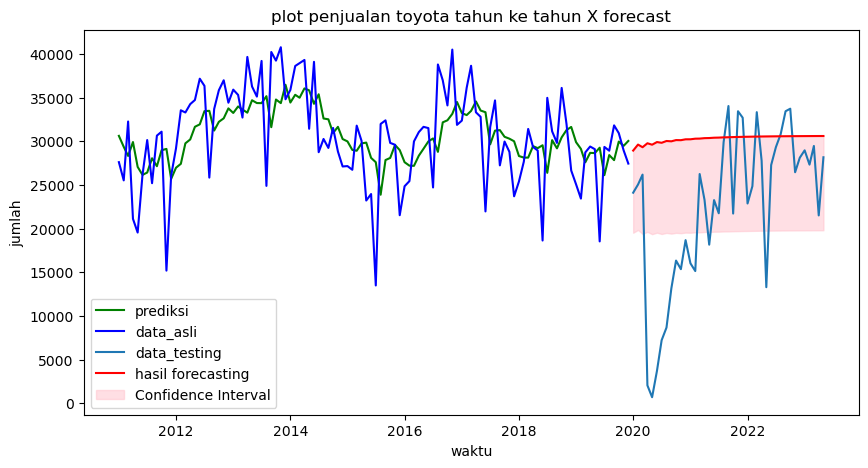

In [22]:
plt.figure(figsize = (10,5))
plt.plot(data_train.Bulan, predictions, label = 'prediksi', color = 'green')
plt.plot(data_train.Bulan, data_train.Penjualan, label = 'data_asli', color = 'blue')
plt.plot(data_testing.Bulan, data_testing.Penjualan, label = 'data_testing')
plt.plot(data_testing.Bulan, forecast_values, label = 'hasil forecasting', color = 'red')
plt.fill_between(data_testing.Bulan, forecast_values, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='pink', alpha=0.5, label='Confidence Interval')
plt.title('plot penjualan toyota tahun ke tahun X forecast')
plt.xlabel('waktu')
plt.ylabel('jumlah')
plt.legend()
plt.show()